In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib
import matplotlib.cm as cm

# Load Data

In [176]:
folder_path = "manual_profiles_data"
data_temp = pd.read_csv(folder_path+"/profiles_hatvan_schneetemperaturen.csv", header = 0)
pitIds = np.sort(list(set(data_temp.profil_id.values)))
pits = []
for i, pitId in enumerate(pitIds):
    print("pit %d: %d" % (i, pitId))
    pit = data_temp.loc[data_temp.profil_id==pitId]
    pits.append(pit)
datedict = {
    6233: "23/03/17 11:00",
    6251: "24/03/17 10:00",
    6252: "24/03/17 13:30",
    6287: "27/03/17 16:45",
    6288: "28/03/17 16:45",
    6289: "29/03/17 10:30",
    6291: "29/03/17 12:00",
    6333: "31/03/17 10:30",
    6400: "01/04/17 13:00",
    6401: "02/04/17 12:00",
    6402: "02/04/17 13:30"      
}

pit 0: 6233
pit 1: 6251
pit 2: 6252
pit 3: 6287
pit 4: 6288
pit 5: 6289
pit 6: 6291
pit 7: 6333
pit 8: 6400
pit 9: 6401
pit 10: 6402


# Plotting

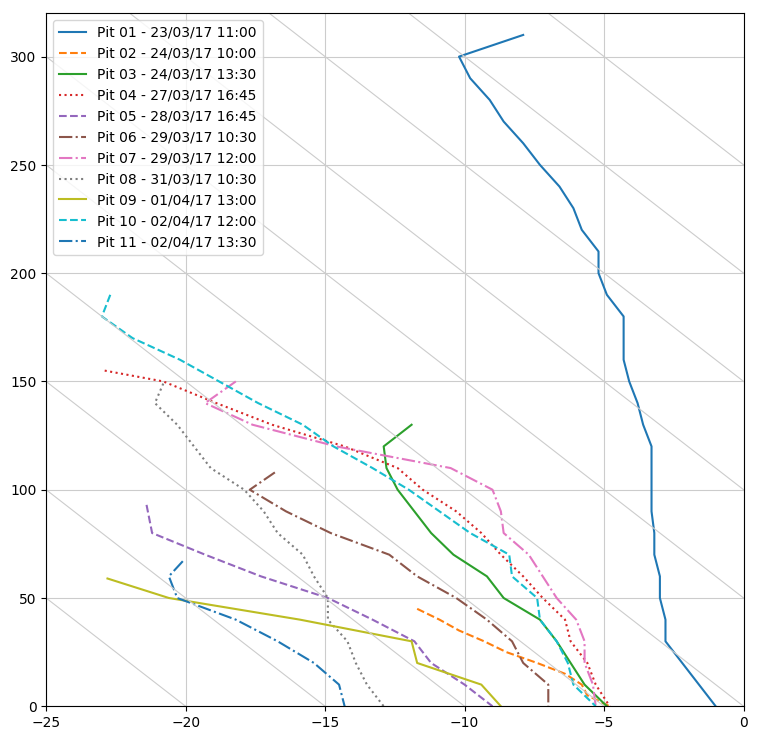

In [195]:
plt.style.use('default')

file_name="temp_gradient"

fig= plt.figure(figsize=(9,9))
ax = fig.gca()

linestyles = ['-', '--', '-', ':', '--', '-.', '-.', ':', '-', '--', '-.']
for index, pit in enumerate(pits):
    pitid = pit["profil_id"].values[0]
    df = pit.sort_values(by=["oberkante"], ascending=False)
    ax.plot(df["temperatur"],df["oberkante"], label="Pit %.2d - %s" % (index+1, datedict[pitid]), ls=linestyles[index])

for i in range(10):    
    ax.plot([-25,0],[50+50*i, -200+50*i], color="0.8", ls="-", lw="0.8")

ax.set_xlim(-25,0)
ax.set_ylim(0,320)
ax.grid(color="0.8", ls="-", lw="0.8")
ax.legend(loc="upper left")
plt.show()
fig.savefig("plots/%s.eps" % file_name)
fig.savefig("plots/%s.png" % file_name, dpi=200)